# Machine Learning (Week 1)

Using Kaggle Introduction to ML with Titanic Disaster: https://www.kaggle.com/keerat/titanic-data-science-solutions/editnb

### Steps to approaching a machine learning problem

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

### 1. Question and Relevant Notes

- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In [2]:
# importing all relevant libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Acquiring training and test data

In [3]:
train_df = pd.read_csv("~/Documents/AOS Research/train.csv") #Instantiate training data
test_df = pd.read_csv("~/Documents/AOS Research/test.csv") #pd.read_csv returns a DataFrame
combine = [train_df, test_df] #combine both data sets

### 3. Analyze by describing data

In [4]:
train_df.head() #To understand which data is categorical and which is numerical

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

Numerical: Continuous: Age, Fare. Discrete: SibSp, Parch

In [5]:
train_df.tail() #Which features are mixed data types and which may contain errors

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Ticket contains a mix of numeric and alphanumeric characters

Name isn't a consistent format for every value

In [6]:
train_df.info() #To understand the values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age, Cabin, and Embarked contain some null values

In [7]:
train_df.describe() #What is the distirbution of numerical feature values across the samples?

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include=["O"]) #What is the distribution of categorical features?

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jensen, Mr. Hans Peder",male,1601,B96 B98,S
freq,1,577,7,4,644


Based on the data analysis, we can make some assumptions now.

1. Our goal is to understand which features correlate to survival the best
2. We may want to complete Age, Cabin, and Embarked as they may correlate to Survival (Age especially).
3. We should drop Name, as it as not standard and would never correlate to survival; Ticket feature would have no logical correlation; Cabin feature should be dropped because it contains too many null values and wouldn't correlate; PassengerID should be dropped because it has no correlation.
4. We could create a new Last Name feature based on the Name data (the Parch and SibSP data could help with that); we could modify the Fare data to include a range of data points
5. Based on problem description, women, children, and upper-class passengers were more likely to suvive

### Analyzing by pivoting features

#### Goal: to confirm or deny our assumptions

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


1. PClass: There seems to be a direct relationship between the Pclass and Average survival rate.  This will be included in the model.

2. Sex: Females had a significantly greater survival rate than males.  Therefore, this will be included in the model.

3. While SibSP and Parch both have lttle to no correlation, it might be useful to derive certain specific features from these individual features.

### Analyze by visualizing data

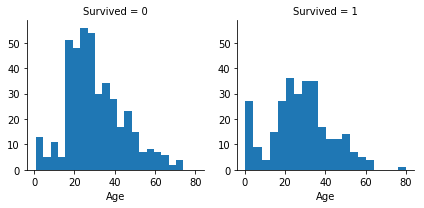

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**Observations.**

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age in our model training.
- Complete the Age feature for null values.
- We should band age groups.

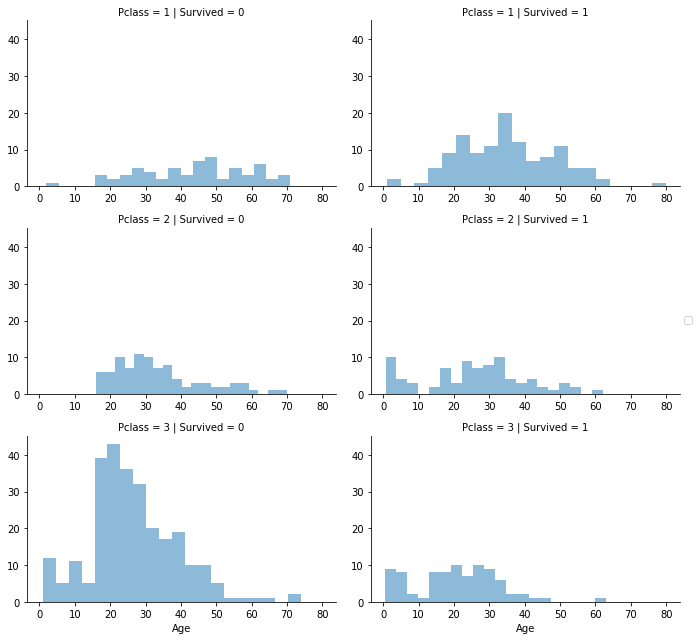

In [14]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Observations.**

- Pclass=3 had most passengers, however most did not survive.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived.
- Most passengers in Pclass=1 survived.
- Pclass varies in terms of Age distribution of passengers.

**Decisions.**

- Consider Pclass for model training.

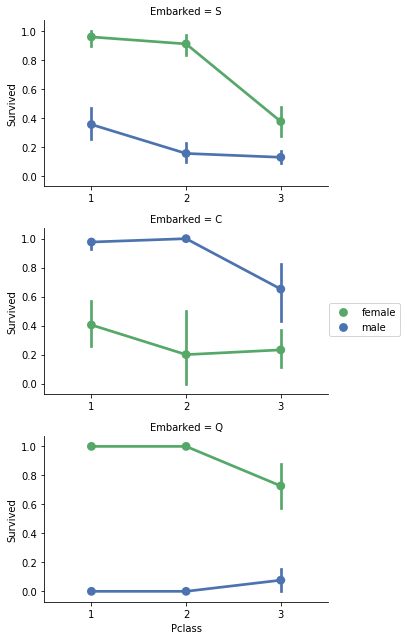

In [15]:
grid = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Observations.**

- Female passengers had much better survival rate than males.
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

**Decisions.**

- Add Sex feature to model training.
- Complete and add Embarked feature to model training.

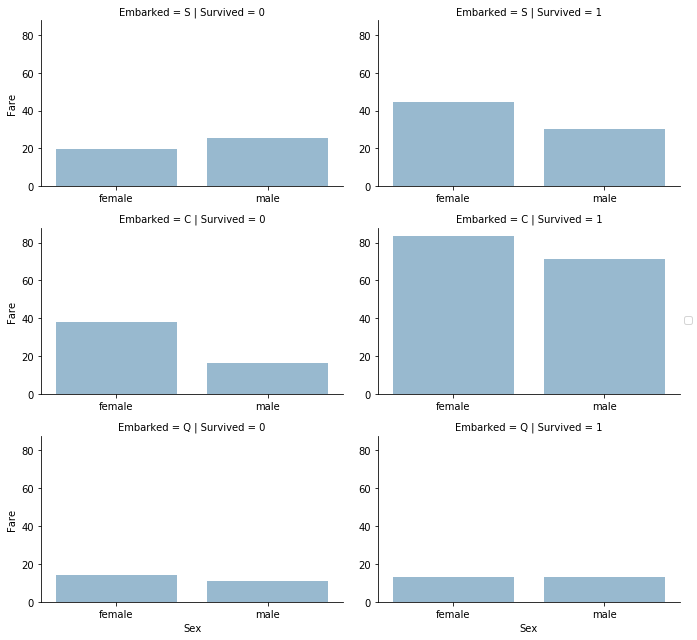

In [16]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**Observations.**

- Higher fare paying passengers had better survival.
- Port of embarkation correlates with survival rates.

**Decisions.**

- Consider banding Fare feature.

### Wrangle data

In [17]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1) #drop Cabin and Ticket axis from train data
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1) #drops Cabin and Ticket axis from test data
combine = [train_df, test_df] #It returns an error because it is already dropped as of the first time it ran

### Modify certain data features to see if there is correlation before dropping completely

- Observation: The data would be much easier to relate with more general and consistent strings as names\

- Decision: Generalize the data

In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Goal: To get every name down to either "Miss", "Mrs", "Mr", "Master", or "Rare"

In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 
                                                 'Jonkheer', 'Major', 'Lady', 'Rev', 'Sir', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
print(train_df.groupby('Title', as_index=False).mean())

    Title  PassengerId  Survived    Pclass        Age     SibSp     Parch  \
0  Master   414.975000  0.575000  2.625000   4.574167  2.300000  1.375000   
1    Miss   411.967568  0.702703  2.291892  21.845638  0.702703  0.540541   
2      Mr   454.499033  0.156673  2.410058  32.368090  0.288201  0.152805   
3     Mrs   452.500000  0.793651  1.992063  35.788991  0.690476  0.825397   
4    Rare   547.043478  0.347826  1.347826  45.545455  0.347826  0.086957   

        Fare  
0  34.703125  
1  43.800092  
2  24.441560  
3  45.330290  
4  37.169748  


Now we need to turn the categorical data feature to numerical by assigning each title with a 1, 2, 3, 4, or 5

In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Goal: Convert other categorical features to numerical

In [21]:
sex_mapping = {'male': 0, 'female': 1}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


In [22]:
#Dropping Name since we now have all relevant data we need from it
#Dropping PassengerId since it isn't relevant
train_df = train_df.drop(['PassengerId'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name'], axis=1)
combine = [train_df, test_df]

In [23]:
for dataset in combine:
    print(dataset.head())

   Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare Embarked  Title  
0  22.0      1      0   7.2500        S      1  
1  38.0      1      0  71.2833        C      3  
2  26.0      0      0   7.9250        S      2  
3  35.0      1      0  53.1000        S      3  
4  35.0      0      0   8.0500        S      1  
   Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0       3    0  34.5      0      0   7.8292        Q      1
1       3    1  47.0      1      0   7.0000        S      3
2       2    0  62.0      0      0   9.6875        

Goal: Complete empty numerical features

### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

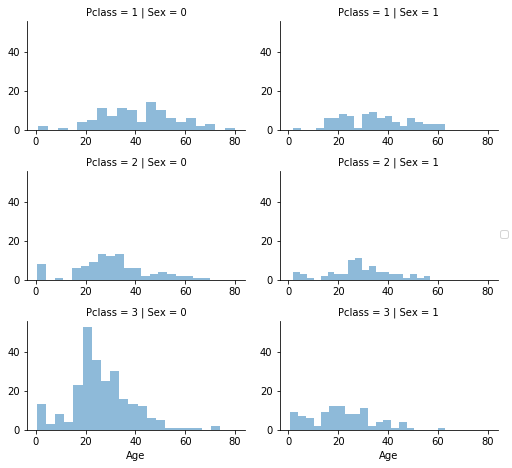

In [24]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [25]:
guess_ages = np.zeros((2,3))
#creating empty array to hold guessed age values


In [26]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

guess_ages #Now holds guessed values

array([[ 42.,  28.,  24.],
       [ 41.,  24.,  22.]])

In [27]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [28]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head() #Now we have age bands that correlate to ordinals

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [29]:
#Now we want to combine Parch and Sib and drop them afterwards
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1) #isAlone is better than others
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,S,1,"(16.0, 32.0]",0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,C,3,"(32.0, 48.0]",0
2,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,S,2,"(16.0, 32.0]",1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,S,3,"(32.0, 48.0]",0
4,0,3,"Allen, Mr. William Henry",0,2,8.0500,S,1,"(32.0, 48.0]",1


In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [33]:
#For completing a categorical feature just use the mode
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone,Age*Class
0,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,0,1,"(16.0, 32.0]",0,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,1,3,"(32.0, 48.0]",0,2
2,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,0,2,"(16.0, 32.0]",1,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,0,3,"(32.0, 48.0]",0,2
4,0,3,"Allen, Mr. William Henry",0,2,8.0500,0,1,"(32.0, 48.0]",1,6


In [35]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [36]:
train_df.head()
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3


### Model, predict and solve

In [37]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

ValueError: labels ['PassengerId'] not contained in axis

In [38]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log #NOT GOOD

coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

In [39]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd #GOOD

/Users/keerat/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

In [40]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree #BEST ONE YET; FINAL DECISION = RANDOM FORESTS

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

In [41]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

NameError: name 'acc_svc' is not defined